## Final Project Submission

Please fill out:
* Student name: Kanwal Arora
* Student pace: self paced / part time / full time: Part Time
* Scheduled project review date/time:  
* Instructor name: Eli
* Blog post URL:


In [2]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
%matplotlib inline

In [3]:
df_house = pd.read_csv('kc_house_data.csv')

In [4]:
df_house.head(15)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [5]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
df_house.drop(['id','date'], axis=1, inplace=True)

In [7]:
df_house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
df_house.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [9]:
len(df_house)

21597

In [10]:
sorted(df_house.bedrooms.unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 33]

In [11]:
sorted(df_house.bathrooms.unique())

[0.5,
 0.75,
 1.0,
 1.25,
 1.5,
 1.75,
 2.0,
 2.25,
 2.5,
 2.75,
 3.0,
 3.25,
 3.5,
 3.75,
 4.0,
 4.25,
 4.5,
 4.75,
 5.0,
 5.25,
 5.5,
 5.75,
 6.0,
 6.25,
 6.5,
 6.75,
 7.5,
 7.75,
 8.0]

In [12]:
sorted(df_house.condition.unique())

[1, 2, 3, 4, 5]

In [13]:
sorted(df_house.grade.unique())

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [14]:
sorted(df_house.yr_built.unique())

[1900,
 1901,
 1902,
 1903,
 1904,
 1905,
 1906,
 1907,
 1908,
 1909,
 1910,
 1911,
 1912,
 1913,
 1914,
 1915,
 1916,
 1917,
 1918,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

In [15]:
sorted(df_house.zipcode.unique())

[98001,
 98002,
 98003,
 98004,
 98005,
 98006,
 98007,
 98008,
 98010,
 98011,
 98014,
 98019,
 98022,
 98023,
 98024,
 98027,
 98028,
 98029,
 98030,
 98031,
 98032,
 98033,
 98034,
 98038,
 98039,
 98040,
 98042,
 98045,
 98052,
 98053,
 98055,
 98056,
 98058,
 98059,
 98065,
 98070,
 98072,
 98074,
 98075,
 98077,
 98092,
 98102,
 98103,
 98105,
 98106,
 98107,
 98108,
 98109,
 98112,
 98115,
 98116,
 98117,
 98118,
 98119,
 98122,
 98125,
 98126,
 98133,
 98136,
 98144,
 98146,
 98148,
 98155,
 98166,
 98168,
 98177,
 98178,
 98188,
 98198,
 98199]

In [16]:
sorted(df_house.sqft_basement.unique())

['0.0',
 '10.0',
 '100.0',
 '1000.0',
 '1008.0',
 '1010.0',
 '1020.0',
 '1024.0',
 '1030.0',
 '1040.0',
 '1050.0',
 '1060.0',
 '1070.0',
 '1080.0',
 '1090.0',
 '110.0',
 '1100.0',
 '1110.0',
 '1120.0',
 '1130.0',
 '1135.0',
 '1140.0',
 '1150.0',
 '1160.0',
 '1170.0',
 '1180.0',
 '1190.0',
 '120.0',
 '1200.0',
 '1210.0',
 '1220.0',
 '1230.0',
 '1240.0',
 '1245.0',
 '1248.0',
 '1250.0',
 '1260.0',
 '1270.0',
 '1275.0',
 '1280.0',
 '1281.0',
 '1284.0',
 '1290.0',
 '130.0',
 '1300.0',
 '1310.0',
 '1320.0',
 '1330.0',
 '1340.0',
 '1350.0',
 '1360.0',
 '1370.0',
 '1380.0',
 '1390.0',
 '140.0',
 '1400.0',
 '1410.0',
 '1420.0',
 '143.0',
 '1430.0',
 '1440.0',
 '145.0',
 '1450.0',
 '1460.0',
 '1470.0',
 '1480.0',
 '1481.0',
 '1490.0',
 '150.0',
 '1500.0',
 '1510.0',
 '1520.0',
 '1525.0',
 '1530.0',
 '1540.0',
 '1548.0',
 '1550.0',
 '1560.0',
 '1570.0',
 '1580.0',
 '1590.0',
 '160.0',
 '1600.0',
 '1610.0',
 '1620.0',
 '1630.0',
 '1640.0',
 '1650.0',
 '1660.0',
 '1670.0',
 '1680.0',
 '1690.0',
 '

In [17]:
df_house[df_house.sqft_basement == '?'].shape[0]

454

In [19]:
sqft_basement_numerical = df_house.sqft_basement[df_house.sqft_basement != '?']
sqft_basement_numerical = sqft_basement_numerical.astype(float)
sqft_basement_numerical_mean = round(sqft_basement_numerical.mean(),1)

In [20]:
df_house['sqft_basement'] = (df_house['sqft_basement'].map(lambda x: sqft_basement_numerical_mean if x == '?' else x)).astype(float)

In [21]:
df_house.sqft_basement.describe()

count    21597.000000
mean       291.852739
std        437.822440
min          0.000000
25%          0.000000
50%          0.000000
75%        550.000000
max       4820.000000
Name: sqft_basement, dtype: float64

In [22]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(10)
memory usage: 3.1 MB


In [23]:
df_house.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [24]:
for i in range(0,5):
    print (str(i) + " - " + str(df_house.view[df_house.view == i].shape[0]))
print("NaN - " + str(df_house.view.isnull().sum()))

0 - 19422
1 - 330
2 - 957
3 - 508
4 - 317
NaN - 63


In [25]:
df_house.drop('view', axis=1, inplace=True)

In [26]:
df_house.waterfront.unique()

array([nan,  0.,  1.])

In [29]:
df_house.waterfront[df_house.waterfront == 0].shape

(19075,)

In [30]:
df_house.waterfront[df_house.waterfront == 1].shape

(146,)

In [31]:
df_house.drop('waterfront', axis=1, inplace=True)

In [32]:
df_house.yr_renovated.shape[0]

21597

In [33]:
df_house.yr_renovated.dtype

dtype('float64')

In [34]:
print ("Not renovated - " + str(df_house.yr_renovated[df_house.yr_renovated == 0].shape[0]))
print ("Renovated - " + str(df_house.yr_renovated[df_house.yr_renovated > 0].shape[0]))
print("NaN - " + str(df_house.yr_renovated.isnull().sum()))

Not renovated - 17011
Renovated - 744
NaN - 3842


In [35]:
df_house['yr_renovated'] = df_house['yr_renovated'].fillna(0)

In [36]:
df_house.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [37]:
df_house['renovated'] = df_house.apply(lambda row: 0 if row.yr_renovated < 1 else 1, axis=1)

In [38]:
df_house.renovated = df_house.renovated.astype('category')

In [39]:
df_house.drop('yr_renovated', axis=1, inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b983ac8>,
      dtype=object)

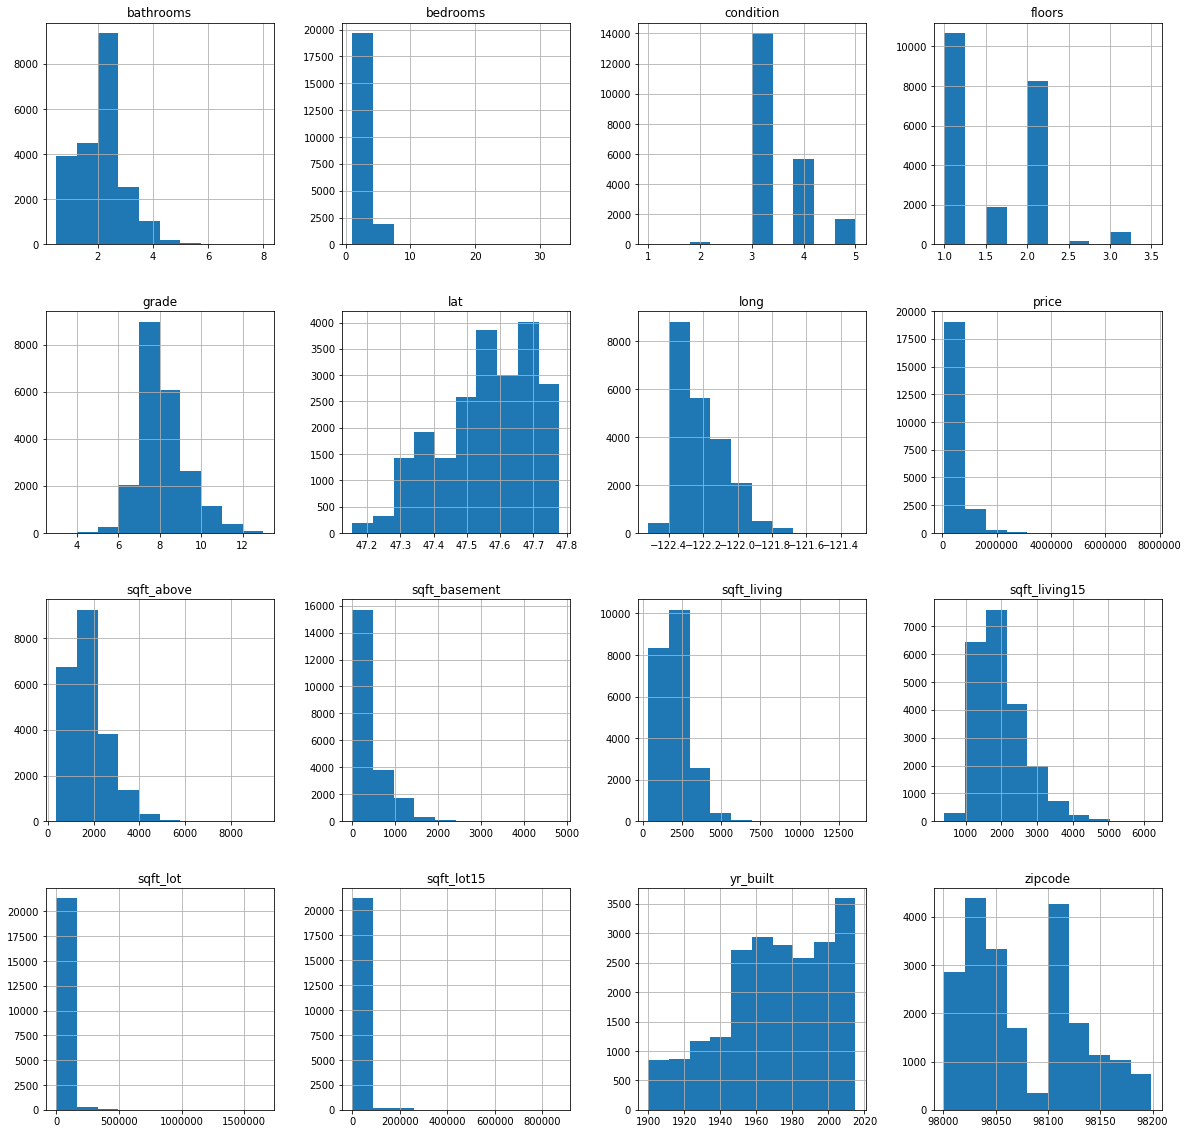

In [40]:
df_house.hist(figsize=(20,20))

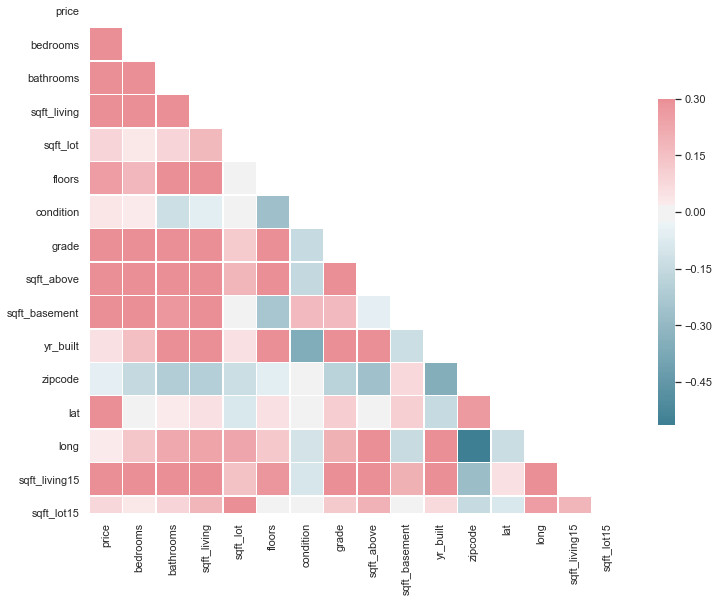

In [44]:
sns.set(style="white")
corr = df_house.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12,12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, linewidth=.5, cbar_kws={"shrink": .5})

In [46]:
df_house.drop('lat', axis=1, inplace=True)
df_house.drop('long', axis=1, inplace=True)
df_house.drop('zipcode', axis=1, inplace=True)

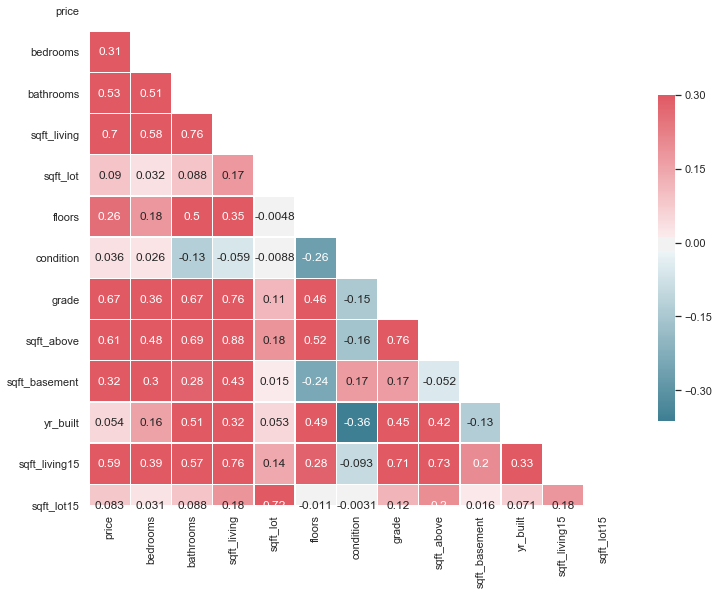

In [48]:
sns.set(style="white")
corr = df_house.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12,12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

In [49]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
renovated        21597 non-null category
dtypes: category(1), float64(4), int64(9)
memory usage: 2.2 MB


In [50]:
to_normalize = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
                'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement',
               'yr_built', 'sqft_living15', 'sqft_lot15']
for i in to_normalize:
    df_house[i] = (df_house[i] - df_house[i].mean()) / df_house[i].std()
df_house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,renovated
0,221900.0,-0.402894,-1.451039,-0.980629,-0.228177,-0.915531,-0.629972,-0.560787,-0.735234,-0.666601,-0.544665,-0.943654,-0.260621,0
1,538000.0,-0.402894,0.174482,0.533357,-0.189735,0.937409,-0.629972,-0.560787,0.460766,0.247012,-0.680835,-0.432877,-0.187695,1
2,180000.0,-1.482459,-1.451039,-1.427201,-0.123137,-0.915531,-0.629972,-1.413157,-1.230546,-0.666601,-1.293596,1.070267,-0.172186,0
3,604000.0,0.676671,1.149794,-0.131054,-0.243873,-0.915531,2.444371,-0.560787,-0.892284,1.411867,-0.204243,-0.914467,-0.284453,0
4,510000.0,-0.402894,-0.150622,-0.436030,-0.169499,-0.915531,-0.629972,0.291583,-0.131194,-0.666601,0.544688,-0.272347,-0.192682,0


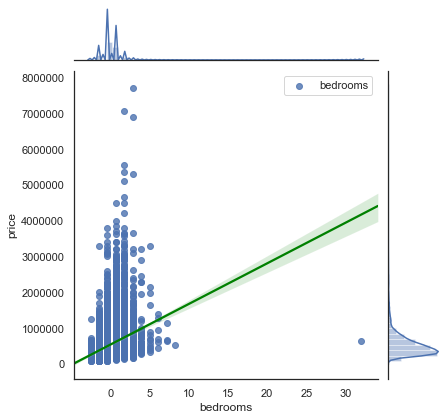

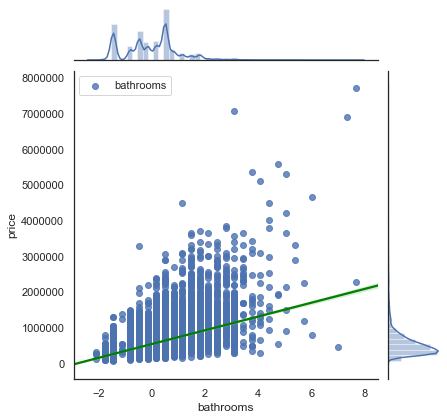

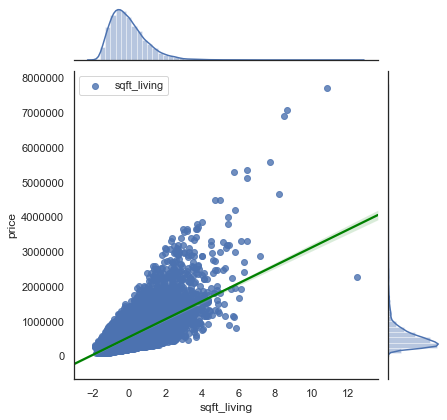

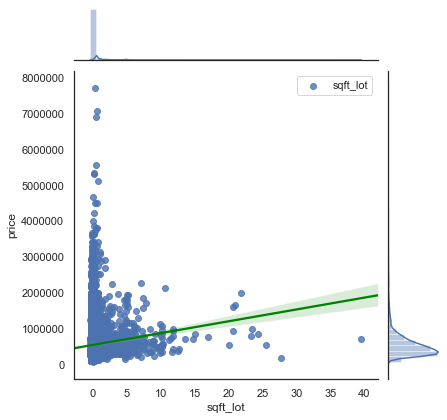

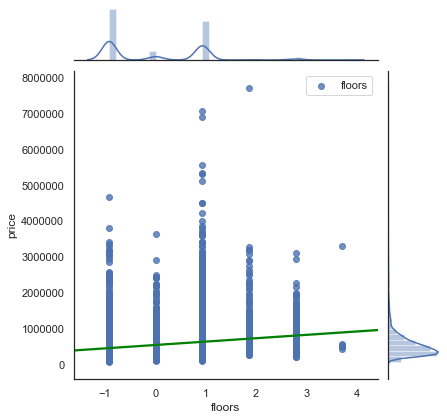

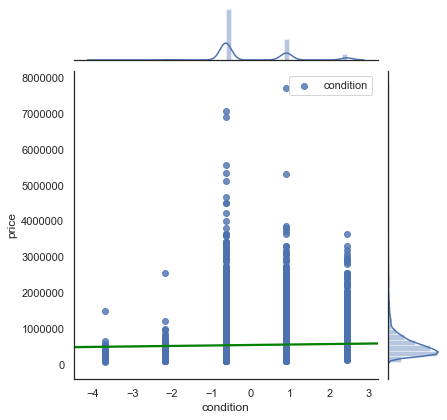

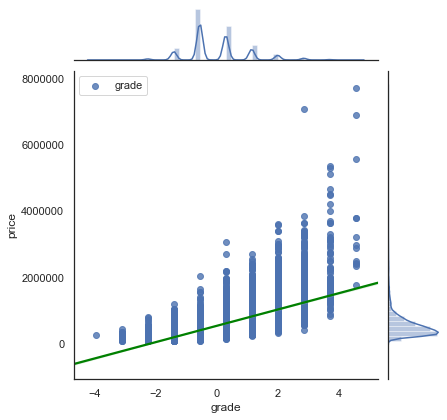

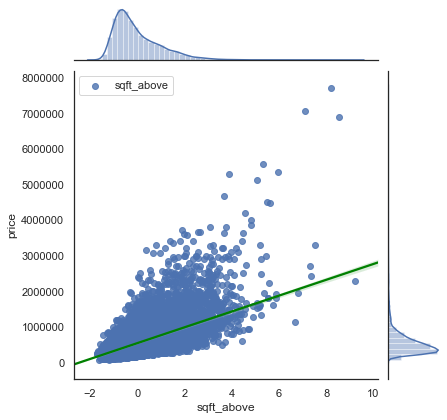

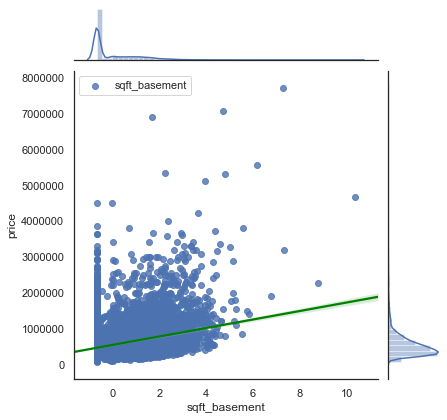

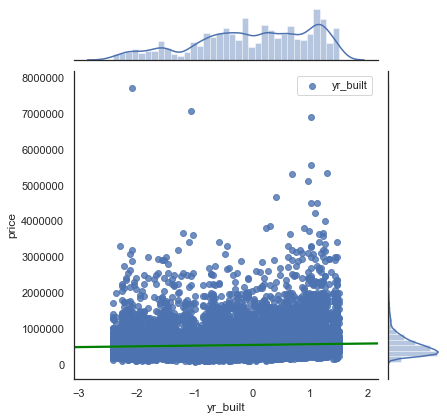

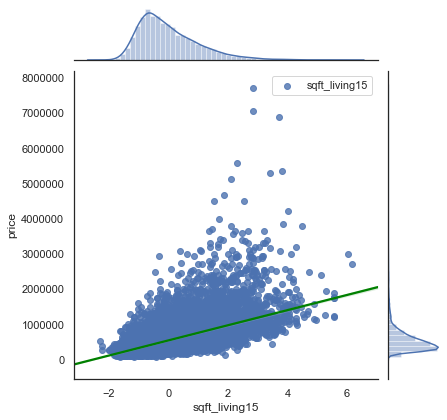

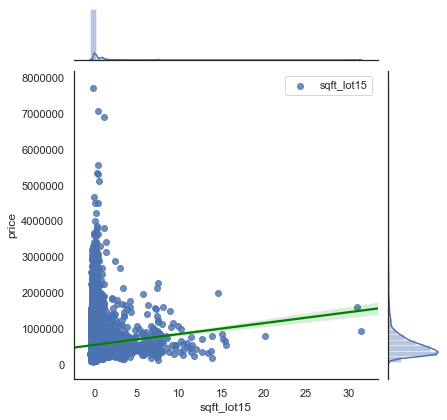

In [51]:
for column in to_normalize:
    sns.jointplot(x=column, y="price",
                 data=df_house,
                 kind='reg',
                 label=column,
                 joint_kws={'line_kws':{'color':'green'}})
#     sns.regplot(walmart[column], walmart.Weekly_Sales, label=column)
    plt.legend()
    plt.show()
  

In [54]:
col_names = df_house.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value']]
for idx, val in enumerate(col_names):
    print("Home Sales: price-" + val)
    print("------------------------------")
    
    f = 'price~' + val
    model = smf.ols(formula=f, data=df_house).fit()
    X_new = pd.DataFrame({val: [df_house[val].min(), df_house[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

Home Sales: price-bedrooms
------------------------------
['bedrooms', 0.0953497028373066, 540296.57350558, 113438.67925928262, 0.0]
Home Sales: price-bathrooms
------------------------------
['bathrooms', 0.27657672267607736, 540296.57350558, 193200.97002213245, 0.0]
Home Sales: price-sqft_living
------------------------------
['sqft_living', 0.49268789904035093, 540296.57350558, 257862.0537913379, 0.0]
Home Sales: price-sqft_lot
------------------------------
['sqft_lot', 0.008077735099593863, 540296.57350558, 33017.66014474627, 5.57162202176598e-40]
Home Sales: price-floors
------------------------------
['floors', 0.06594805661983016, 540296.57350558, 94341.43776210016, 0.0]
Home Sales: price-condition
------------------------------
['condition', 0.0013000622131938977, 540296.57350558, 13245.963601118623, 1.1565566735233775e-07]
Home Sales: price-grade
------------------------------
['grade', 0.4461582329973499, 540296.57350558, 245383.83256397504, 0.0]
Home Sales: price-sqft_above

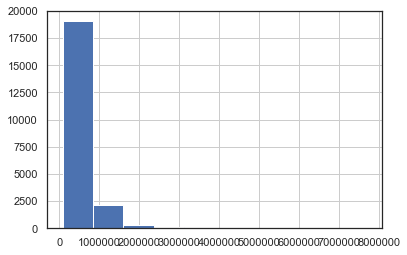

In [55]:
df_house.price.hist()

In [56]:
df_log = df_house
df_log["price"] = np.log(df_log["price"])

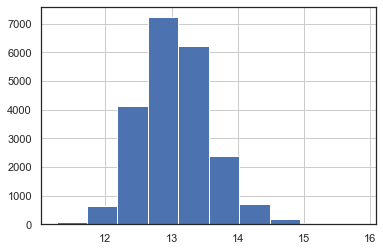

In [57]:
df_log.price.hist()

In [58]:
col_names = df_log.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("Home Sales: price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df_house).fit()
    X_new = pd.DataFrame({val: [df_log[val].min(), df_log[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

Home Sales: price~bedrooms
------------------------------
['bedrooms', 0.11789605640983081, 13.048210941923932, 0.18079784037336516, 0.0]
Home Sales: price~bathrooms
------------------------------
['bathrooms', 0.30387583204123636, 13.048210941923932, 0.2902630001962503, 0.0]
Home Sales: price~sqft_living
------------------------------
['sqft_living', 0.483282036851469, 13.048210941923932, 0.366052962453382, 0.0]
Home Sales: price~sqft_lot
------------------------------
['sqft_lot', 0.01000494071121949, 13.048210941923932, 0.0526684889938695, 3.8044755151992634e-49]
Home Sales: price~floors
------------------------------
['floors', 0.09649098896318631, 13.048210941923932, 0.1635637195675912, 0.0]
Home Sales: price~condition
------------------------------
['condition', 0.0015146300738440033, 13.048210941923932, 0.020492591704928786, 1.0575553096643615e-08]
Home Sales: price~grade
------------------------------
['grade', 0.49522239530874335, 13.048210941923932, 0.37054737207699057, 0.0]


In [59]:
y = df_log[["price"]]
X = df_log.drop("price", axis=1)
r_list = []
adj_r_list = []
list_n = list(range(5,86,10))
linreg = LinearRegression()
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X, np.ravel(y))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X[selected_columns],y)
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    print(r_squared)
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print(adjusted_r_squared)
r_list.append(r_squared)
adj_r_list.append(adjusted_r_squared)

price    0.625535
dtype: float64
price    0.62531
dtype: float64
price    0.646884
dtype: float64
price    0.646671
dtype: float64
price    0.646884
dtype: float64
price    0.646671
dtype: float64
price    0.646884
dtype: float64
price    0.646671
dtype: float64
price    0.646884
dtype: float64
price    0.646671
dtype: float64
price    0.646884
dtype: float64
price    0.646671
dtype: float64
price    0.646884
dtype: float64
price    0.646671
dtype: float64
price    0.646884
dtype: float64
price    0.646671
dtype: float64
price    0.646884
dtype: float64
price    0.646671
dtype: float64


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3)

MSE_test = []
MSE_train = []
list_n = list(range(5,86,10))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X_train, np.ravel(y_train))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X_train[selected_columns],y_train)
    yhat_train = linreg.predict(X_train[selected_columns])
    yhat_test = linreg.predict(X_test[selected_columns])
    mse_train = np.sum((y_train-yhat_train)**2)/len(y_train)
    mse_test =np.sum((y_test-yhat_test)**2)/len(y_test)
    print(mse_train)
    print(mse_test)
MSE_test.append(mse_test)
MSE_train.append(mse_train)

price    0.101889
dtype: float64
price    0.105155
dtype: float64
price    0.097302
dtype: float64
price    0.100346
dtype: float64
price    0.097302
dtype: float64
price    0.100346
dtype: float64
price    0.097302
dtype: float64
price    0.100346
dtype: float64
price    0.097302
dtype: float64
price    0.100346
dtype: float64
price    0.097302
dtype: float64
price    0.100346
dtype: float64
price    0.097302
dtype: float64
price    0.100346
dtype: float64
price    0.097302
dtype: float64
price    0.100346
dtype: float64
price    0.097302
dtype: float64
price    0.100346
dtype: float64


In [61]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# select 85 best predictors

select_85 = RFE(linreg, n_features_to_select = 85)
select_85 = select_n.fit(X, np.ravel(y))
selected_columns = X.columns[select_n.support_]

cv_10_results = cross_val_score(linreg, X[selected_columns], y, cv=10, scoring="neg_mean_squared_error")

cv_10_results

array([-0.09813172, -0.10379203, -0.09914891, -0.10079696, -0.09391869,
       -0.09925978, -0.09490073, -0.10686307, -0.09949257, -0.09250701])

In [62]:
from statsmodels.formula.api import ols
outcome = 'price'
predictors = df_log.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=df_log).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     3041.
Date:                Tue, 07 Apr 2020   Prob (F-statistic):               0.00
Time:                        18:33:17   Log-Likelihood:                -5551.2
No. Observations:               21597   AIC:                         1.113e+04
Df Residuals:                   21583   BIC:                         1.124e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         13.0464      0.002   6007.990      0.000      13.042      13.051
renovated[T.1]     0.0519      0.012      4.220      0.000       0.028       0.076
bedrooms          -0.0274      0.003    -10.081      0.000      -0.033      -0.022
bathrooms          0.0614      0.004     15.736      0.000       0.054       0.069
sqft_living        0.1475      0.030      4.870      0.000       0.088       0.207
sqft_lot           0.0101      0.003      3.281      0.001       0.004       0.016
floors             0.0679      0.003     22.934      0.000       0.062       0.074
condition          0.0288      0.002     12.265      0.000       0.024       0.033
grade              0.2497      0.004     65.313      0.000       0.242       0.257
sqft_above        -0.0498      0.027     -1.826      0.068      -0.103       0.004
sqft_basement      0.0214      0.014      1.483      0.138      -0.007       0.050
yr_built          -0.1669      0.003    -56.260      0.000      -0.173      -0.161
sqft_living15      0.0836      0.004     23.594      0.000       0.077       0.091
sqft_lot15        -0.0140      0.003     -4.519      0.000      -0.020      -0.008
==============================================================================
Omnibus:                       73.553   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.482
Skew:                          -0.066   Prob(JB):                     2.25e-20
Kurtosis:                       3.288   Cond. No.                         44.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
import statsmodels.api as sm
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [64]:
result = stepwise_selection(X.drop('renovated', axis=1), y, verbose = True)
print('resulting features:')
print(result)

//anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Add  grade                          with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  bathrooms                      with p-value 3.05697e-98
Add  sqft_living15                  with p-value 4.93339e-77
Add  floors                         with p-value 6.23162e-62
Add  sqft_above                     with p-value 2.54982e-69
Add  condition                      with p-value 9.46371e-29
Add  bedrooms                       with p-value 8.51446e-24
Add  sqft_lot15                     with p-value 0.00226275
Add  sqft_lot                       with p-value 0.00110152
resulting features:
['grade', 'yr_built', 'sqft_living', 'bathrooms', 'sqft_living15', 'floors', 'sqft_above', 'condition', 'bedrooms', 'sqft_lot15', 'sqft_lot']


In [65]:
np.asarray(X)

array([[-0.40289369195822594, -1.4510390875658492, -0.980629390941544,
        ..., -0.9436537692838103, -0.26062067647540427, 0],
       [-0.40289369195822594, 0.17448175263995447, 0.5333568052389458,
        ..., -0.43287671783505816, -0.1876952614066708, 1],
       [-1.4824588365266875, -1.4510390875658492, -1.427200858879674,
        ..., 1.0702671764284124, -0.17218623648255102, 0],
       ...,
       [-1.4824588365266875, -1.77614325560701, -1.1549011833076435, ...,
        -1.4106499306083837, -0.39418894550275263, 0],
       [-0.40289369195822594, 0.49958592068111524, -0.5231659359805326,
        ..., -0.8414983589940599, -0.42058728579912674, 0],
       [-1.4824588365266875, -1.77614325560701, -1.1549011833076435, ...,
        -1.4106499306083837, -0.4180207804925348, 0]], dtype=object)

In [66]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
bedrooms         21597 non-null float64
bathrooms        21597 non-null float64
sqft_living      21597 non-null float64
sqft_lot         21597 non-null float64
floors           21597 non-null float64
condition        21597 non-null float64
grade            21597 non-null float64
sqft_above       21597 non-null float64
sqft_basement    21597 non-null float64
yr_built         21597 non-null float64
sqft_living15    21597 non-null float64
sqft_lot15       21597 non-null float64
renovated        21597 non-null category
dtypes: category(1), float64(12)
memory usage: 2.0 MB


In [67]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X.renovated = X.renovated.astype(int)

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 5)
selector = selector.fit(X, y)
selector.support_

//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([False, False,  True, False, False, False,  True,  True, False,
        True,  True, False, False])

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 9)
selector = selector.fit(X_train, y_train)
selector.support_ 
selected_columns = X_train.columns[selector.support_ ]
linreg.fit(X_train[selected_columns],y_train)

//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
X_train.columns[selector.support_]

Index(['bathrooms', 'sqft_living', 'floors', 'condition', 'grade',
       'sqft_above', 'yr_built', 'sqft_living15', 'renovated'],
      dtype='object')

In [70]:
linreg.score(X_train[X_train.columns[selector.support_]], y_train)

0.649334038601535